In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (2809, 3811, 3)


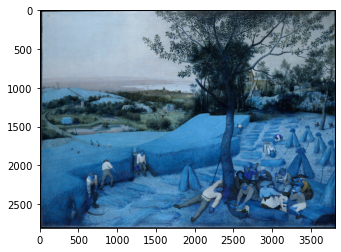

In [2]:
image = cv2.imread('test_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

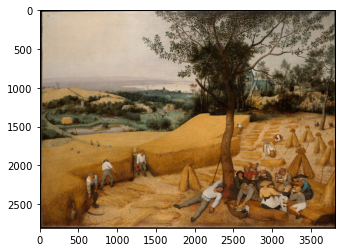

In [6]:
#https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

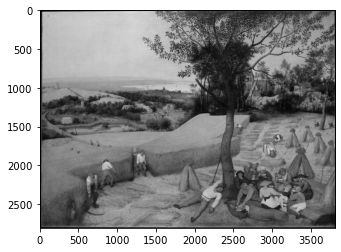

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

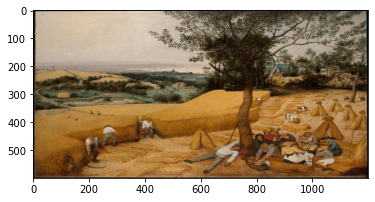

In [7]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [15]:
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = 8)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]


    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors



[array([130.69709662,  78.07929689,  24.00522679]),
 array([75.10709182, 57.91983524, 34.72736698]),
 array([165.46547222, 113.54194052,  47.47129438]),
 array([112.2681669, 101.4387795,  76.4845679]),
 array([190.38201423, 142.70263005,  77.82866481]),
 array([162.07783082, 148.31754546, 129.47401169]),
 array([206.1914764 , 189.44162208, 169.9929279 ]),
 array([35.49648745, 25.46263282, 13.28139231])]

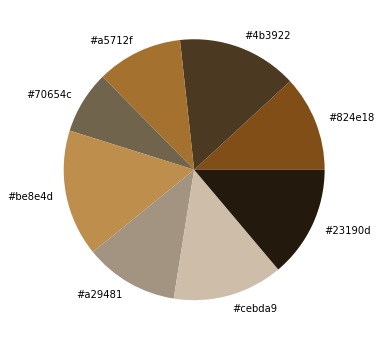

In [21]:
get_colors(get_image('test_image.jpg'), 8, True)

In [22]:
IMAGE_DIRECTORY = 'C:\\Users\\Meehir\\Documents\\GitHub\\project-5\\images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

In [31]:
import os
os.getcwd()

'c:\\Users\\Meehir\\Documents\\GitHub\\project-5'

In [60]:
import cv2
 
# Load the images
img1 = cv2.imread('C:\\Users\\Meehir\\Documents\\GitHub\\project-5\\images\\5.jpg')
img2 = cv2.imread('C:\\Users\\Meehir\\Documents\\GitHub\\project-5\\images\\2.jpg')
 
# Convert it to HSV
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
 
# Calculate the histogram and normalize it
hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
 
# find the metric value
metric_val = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA)
metric_val

0.9325025047368743

In [37]:
metric_val

0.4746432057732442

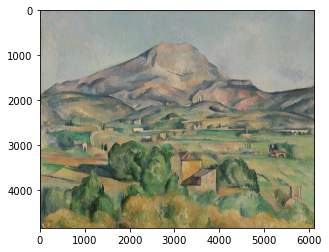

In [29]:
plt.imshow(images[0])

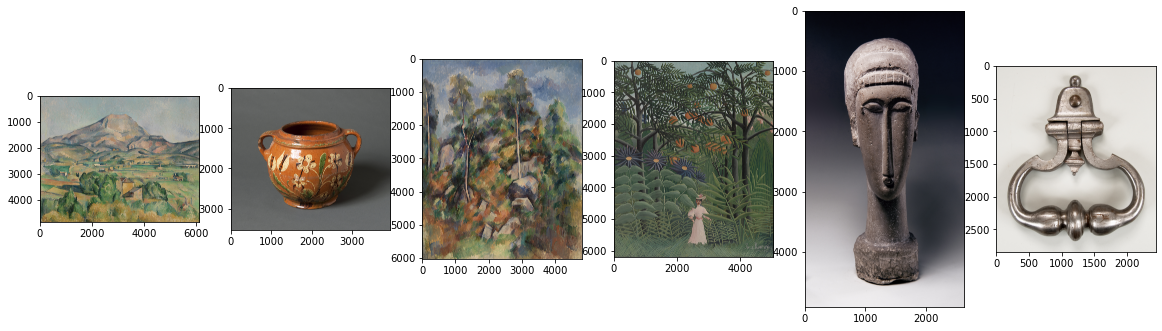

In [23]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [24]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [25]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

In [27]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 10, 5)

<Figure size 1440x720 with 0 Axes>